In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [55]:
df = pd.read_csv('credit_clients.csv')

In [63]:
df['default payment next month'].value_counts() 

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [64]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

In [65]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [7]:
"""
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

"""

"\nparam_grid = { \n    'n_estimators': [25, 50, 100, 150], \n    'max_features': ['sqrt', 'log2', None], \n    'max_depth': [3, 6, 9], \n    'max_leaf_nodes': [3, 6, 9], \n} \n\n"

In [8]:
"""
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_)
"""

'\ngrid_search = GridSearchCV(RandomForestClassifier(), \n                           param_grid=param_grid) \ngrid_search.fit(x_train, y_train) \nprint(grid_search.best_estimator_)\n'

In [32]:
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_depth': [10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 3, 5],
    'class_weight': [None, 'balanced'],
}

In [35]:
model = RandomForestClassifier(
    oob_score=True,   
    random_state=42,
    n_jobs=-1        
)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,           
    scoring='f1',   
    cv=5,                
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
# I played a lot with the parameters and the best model I found is this one,  At first I took fewer trees, and limited the depth of each tree.
# I got a a bit better results but I wanted to improve the model so I increased more trees and mac dept to capture more information and I added Class weight to balance the data.

In [36]:
print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Best Params: {'n_estimators': 250, 'min_samples_leaf': 5, 'max_depth': 15, 'class_weight': None}
Best CV Score: 0.6885269387061219


In [37]:
"""model = RandomForestClassifier(
    n_estimators=200,   
    max_depth=20,       
    min_samples_leaf=2, 
    n_jobs=-1,          
    random_state=42,
    class_weight='balanced'
)"""

"model = RandomForestClassifier(\n    n_estimators=200,   \n    max_depth=20,       \n    min_samples_leaf=2, \n    n_jobs=-1,          \n    random_state=42,\n    class_weight='balanced'\n)"

In [38]:
prediction = random_search.predict(x_test)

In [39]:
model = RandomForestClassifier() 
model.fit(x_train, y_train) 
  
# predict the mode 
prediction = model.predict(x_test) 
  
# performance evaluation metrics 
print(classification_report(prediction, y_test)) 

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      2318
           1       0.62      0.73      0.67      1664

    accuracy                           0.70      3982
   macro avg       0.70      0.70      0.70      3982
weighted avg       0.71      0.70      0.70      3982



In [40]:
# Evaluating the model  
print("Accuracy:", accuracy_score(y_test, prediction))

Accuracy: 0.6986438975389252


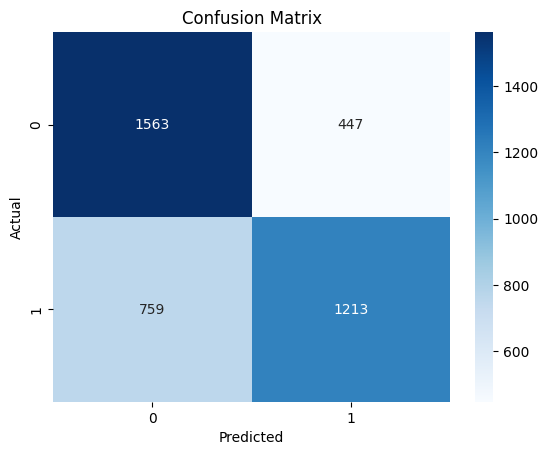

In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
The accuracy is 69% but when I looked at the precision and recall, class 0 has higher precision and lower recall.<br>
But class 1 has lower precision and higher recall. According to the Logistic Regression Fine tuned model, Random Forest get a bit better accuracy.<br>
But unlike Random Forest, Logistic Regression  and SVC model have higher precision for 1 and lower for 0 and higher recall for 0 and lower for 1.
Among of these three models, XGBoost fine tuned model got highest accuracy and like Random Forests model and SVC model, it has higher precision for class 0 and lower for class 1.